## 1. <a>Import Libraries</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest


from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

## 2. <a>Read Data</a>


In [2]:
df_transformed = pd.read_csv('../Data/Data_Log_MinMaxSca.csv')
df_transformed

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.379045           0.862497   0.422994          0.000000   
1     0.819116           0.932886   0.000000          0.000000   
2     0.793799           1.000000   0.615884          0.626611   
3     0.752871           0.710494   0.677125          0.688918   
4     0.680676           1.000000   0.262325          0.266894   
...        ...                ...        ...               ...   
8945  0.343413           1.000000   0.525644          0.000000   
8946  0.304921           1.000000   0.528416          0.000000   
8947  0.324169           0.874469   0.461047          0.000000   
8948  0.271065           0.874469   0.000000          0.000000   
8949  0.601093           0.736966   0.647923          0.659207   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.455879      0.000000             0.222393   
1                   0.000000      0.815075             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      0.495472             0.115477   
4                   0.000000      0.000000             0.115477   
...                      ...           ...                  ...   
8945                0.566509      0.000000             1.000000   
8946                0.569497      0.000000             1.000000   
8947                0.496890      0.000000             0.874469   
8948                0.000000      0.336954             0.000000   
8949                0.000000      0.450926             0.736966   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.115477   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.115477                          0.000000   
4                       0.115477                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.874469   
8946                    0.000000                          0.874469   
8947                    0.000000                          0.736966   
8948                    0.000000                          0.000000   
8949                    0.736966                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       0.186733      0.466811   
1                   0.243529          0.333889       0.000000      0.771814   
2                   0.000000          0.000000       0.435970      0.782631   
3                   0.087355          0.143798       0.117816      0.782631   
4                   0.000000          0.000000       0.117816      0.495375   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       0.330750      0.466811   
8946                0.000000          0.000000       0.330750      0.466811   
8947                0.000000          0.000000       0.304549      0.466811   
8948                0.168234          0.227915       0.000000      0.358276   
8949                0.313963          0.227915       0.540180      0.495375   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.490324          0.438874          0.000000     1.0  
1     0.767919          0.620013          0.289506     1.0  
2     0.593925          0.572303          0.000000     1.0  
3     0.000000          0.510325          0.000000     1.0  
4     0.601905          0.488693          0.000000     1.0  
...        ...               ...               ...     ...  
8945  0.534304          0.346621          0.584963     0.0  
8946  0.519056          0.510325          0.000000     0.0  
8947  0.407049          0.392423          0.321928     0.0  
8948  0.3

In [3]:
df_transformed.describe().T

count      mean       std  min       25%  \
BALANCE                           8950.0  0.625260  0.204303  0.0  0.493377   
BALANCE_FREQUENCY                 8950.0  0.894384  0.214369  0.0  0.917538   
PURCHASES                         8950.0  0.453654  0.270071  0.0  0.343008   
ONEOFF_PURCHASES                  8950.0  0.301848  0.305813  0.0  0.000000   
INSTALLMENTS_PURCHASES            8950.0  0.334527  0.307642  0.0  0.000000   
CASH_ADVANCE                      8950.0  0.308441  0.331415  0.0  0.000000   
PURCHASES_FREQUENCY               8950.0  0.521199  0.400083  0.0  0.115477   
ONEOFF_PURCHASES_FREQUENCY        8950.0  0.228954  0.312592  0.0  0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  0.389631  0.406627  0.0  0.000000   
CASH_ADVANCE_FREQUENCY            8950.0  0.123883  0.171033  0.0  0.000000   
CASH_ADVANCE_TRX                  8950.0  0.169610  0.209390  0.0  0.000000   
PURCHASES_TRX                     8950.0  0.322051  0.233517  0.0  0.117816   
CREDIT_LIMIT                      8950.0  0.652798  0.128526  0.0  0.540453   
PAYMENTS                          8950.0  0.611451  0.146921  0.0  0.549316   
MINIMUM_PAYMENTS                  8950.0  0.525361  0.104227  0.0  0.456815   
PRC_FULL_PAYMENT                  8950.0  0.169849  0.305299  0.0  0.000000   
TENURE                            8950.0  0.926872  0.210596  0.0  1.000000   

                                       50%       75%  max  
BALANCE                           0.687352  0.774072  1.0  
BALANCE_FREQUENCY                 1.000000  1.000000  1.0  
PURCHASES                         0.545574  0.649340  1.0  
ONEOFF_PURCHASES                  0.345114  0.599149  1.0  
INSTALLMENTS_PURCHASES            0.449024  0.613888  1.0  
CASH_ADVANCE                      0.000000  0.652036  1.0  
PURCHASES_FREQUENCY               0.584963  0.938600  1.0  
ONEOFF_PURCHASES_FREQUENCY        0.115477  0.378512  1.0  
PURCHASES_INSTALLMENTS_FREQUENCY  0.222393  0.807355  1.0  
CASH_ADVANCE_FREQUENCY            0.000000  0.219003  1.0  
CASH_ADVANCE_TRX                  0.000000  0.333889  1.0  
PURCHASES_TRX                     0.353447  0.491282  1.0  
CREDIT_LIMIT                      0.638980  0.760195  1.0  
PAYMENTS                          0.623446  0.696940  1.0  
MINIMUM_PAYMENTS                  0.510325  0.592675  1.0  
PRC_FULL_PAYMENT                  0.000000  0.192645  1.0  
TENURE                            1.000000  1.000000  1.0

## 3. <a>TSNE Visualize Data</a>


In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, 
            perplexity=50,  
            random_state=42,
            n_iter=300).fit_transform(df_transformed)

In [5]:
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed



feature1   feature2
0    -6.625538   0.815032
1    -4.543350  -5.765755
2     3.539947  -3.538715
3     6.848043  -7.046731
4     2.528310 -10.778842
...        ...        ...
8945 -0.804929   6.344171
8946 -3.105992   5.938567
8947 -1.853857   6.103190
8948 -1.735330  -6.758800
8949  6.168268  -4.575955

[8950 rows x 2 columns]

[Text(0.5, 1.0, 'All Data')]

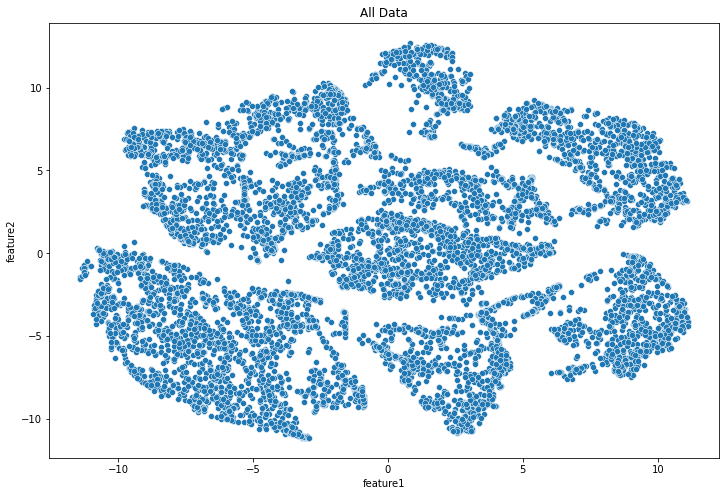

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    palette=sns.color_palette("hls", 2)
).set(title='All Data')

# Clustreing


## 1. <a>K-Means</a>


#### First, Select number of clusters (k) using Elbow Method 

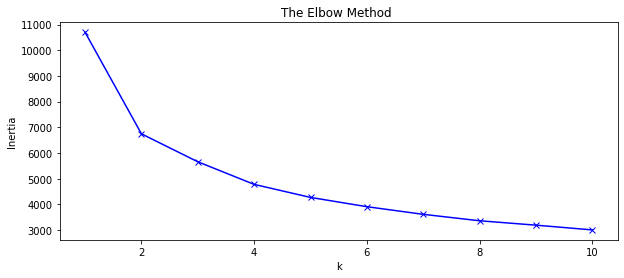

In [7]:
# To plot Elbow With Inertia 
inertia = []
Range = [*range(1,11)]

for k in Range: 
    kmean = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    inertia.append(kmean.inertia_)
    
plt.figure(figsize=(10,4))
plt.plot(Range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method ')
plt.show()

In [8]:
# To calc. the best number of k from elbow method curve
drop_variation = []
drop_variation.append(0) #add 0 in the first element 

for i in range(len(inertia) -1):
    dropValue = inertia[i] - inertia[i+1]
    drop_variation.append(dropValue) 

# select suitable k that have large drop in the variation
k = Range[np.argmax(drop_variation)]
print("Suitable number of clusters = ",k)

Suitable number of clusters =  2


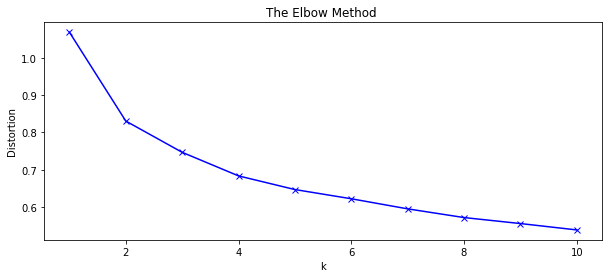

In [9]:
# To plot Elbow With Distortion 
from scipy.spatial.distance import cdist
distortions = []
Range = [*range(1,11)]

for n in Range:
    kmean = KMeans(n_clusters=n, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    distortions.append(np.average(np.min(cdist(df_transformed, kmean.cluster_centers_, 'euclidean'), axis=1)))
    
plt.figure(figsize=(10,4))
plt.plot(Range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ')
plt.show()

###  KMean in Sklearn

In [10]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_transformed)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2549
sum of elements that contain in cluster 1 : 2038
sum of elements that contain in cluster 2 : 2287
sum of elements that contain in cluster 3 : 2076
--------------------------------------------------


In [11]:
# Calc. silhouette score for kmean sklearn
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.281


In [12]:
# Calc. silhoutte score for different k
for i in [*range(2,7)]:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df_transformed)
    label = kmeans.labels_
    print("For n_clusters =",i,"The average silhouette_score is :",silhouette_score(df_transformed,  label, metric='euclidean'))

For n_clusters = 2 The average silhouette_score is : 0.3315230238761367
For n_clusters = 3 The average silhouette_score is : 0.2798557861835874
For n_clusters = 4 The average silhouette_score is : 0.2805631005988395
For n_clusters = 5 The average silhouette_score is : 0.28788430274428345
For n_clusters = 6 The average silhouette_score is : 0.28763461188226574


We notice that silhoutte Score will be better for 2 or 5 Clusters (k = 2 or k = 5)

In [13]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.417


The main motive is to decrease the DB index. 

In [14]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 3697.518


##### TSNE

In [15]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -6.625538   0.815032         3
1    -4.543350  -5.765755         0
2     3.539947  -3.538715         3
3     6.848043  -7.046731         3
4     2.528310 -10.778842         3
...        ...        ...       ...
8945 -0.804929   6.344171         2
8946 -3.105992   5.938567         2
8947 -1.853857   6.103190         2
8948 -1.735330  -6.758800         0
8949  6.168268  -4.575955         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

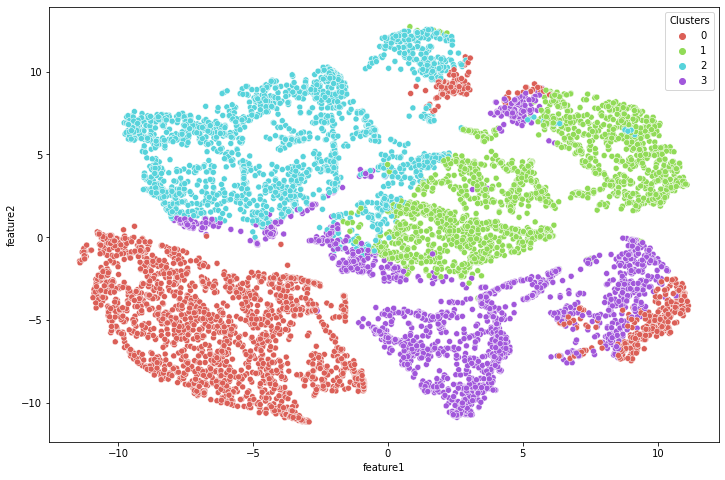

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## 2. <a>DBSCAN</a>


#### Calculate Knn-Matrix 

In [17]:
from sklearn.neighbors import NearestNeighbors
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
min_s = 10
knn = NearestNeighbors(n_neighbors=min_s+1)
knn.fit(df_transformed)
distances, neighbors = knn.kneighbors(df_transformed)

# distances ---> distance of each point to k nearest neighbours for it
# neighbors ---> index of k nearest neighbors to each poi nt

In [18]:
neighbors  # nearest neighbours for each point in data

array([[   0, 8020, 5030, ..., 5773, 4874, 7754],
       [   1, 7668, 5646, ..., 4934, 3271, 7894],
       [   2,  267, 2758, ..., 1321,  298,   76],
       ...,
       [8947, 8942, 8922, ..., 8934, 5571, 5291],
       [8948, 7906, 8884, ..., 8316, 8901,  740],
       [8949,  549, 8554, ..., 8876, 4698, 8479]], dtype=int64)

In [19]:
# sort the distances, take last column only and sort them 
distances = np.sort(distances[:, -1], axis = 0) 

##### Elbow Method

Text(0.5, 1.0, 'Elbow Method for Choosing eps')

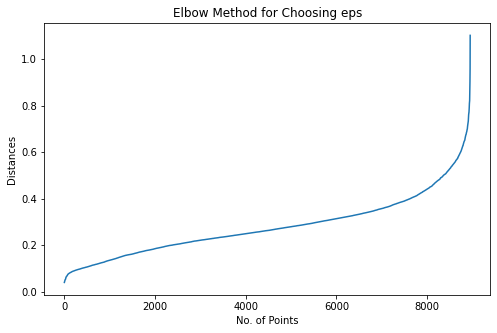

In [20]:
# plot elbow curve to choose first suitable epsilon from it
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("No. of Points")
plt.ylabel("Distances")
plt.title("Elbow Method for Choosing eps")

#### From Elbow curve we can choose epsilon that give us less noise and good clustering

In [21]:
clustering_DB_1 = DBSCAN(eps=0.51, min_samples=12).fit(df_transformed)
label_DBScan_1 = clustering_DB_1.labels_

In [22]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    8766
-1     172
 1      12
dtype: int64

### Calc. Silhouette score for DBSCAN 

In [23]:
# Drop Noise points before calc. silhouette score
df_copy_1 = df_transformed.copy()
df_copy_1['Labels'] = label_DBScan_1
df_copy_1_clustered = df_copy_1.loc[(df_copy_1.Labels >= 0)] # dataframe of data without noise points 
df_copy_1_clustered_labels = df_copy_1_clustered['Labels']
df_copy_1_clustered.drop('Labels', axis=1, inplace=True)

In [24]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_copy_1_clustered, df_copy_1_clustered_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: -0.006


In [25]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_copy_1_clustered, df_copy_1_clustered_labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.369


The main motive is to decrease the DB index. 

In [26]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_copy_1_clustered, df_copy_1_clustered_labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 10.410


##### TSNE

In [27]:
df_embed_dbscan = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_dbscan['Clusters']= pd.DataFrame(label_DBScan_1)
df_embed_dbscan

feature1   feature2  Clusters
0    -6.625538   0.815032         0
1    -4.543350  -5.765755         0
2     3.539947  -3.538715         0
3     6.848043  -7.046731         1
4     2.528310 -10.778842         0
...        ...        ...       ...
8945 -0.804929   6.344171         0
8946 -3.105992   5.938567         0
8947 -1.853857   6.103190         0
8948 -1.735330  -6.758800         0
8949  6.168268  -4.575955         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

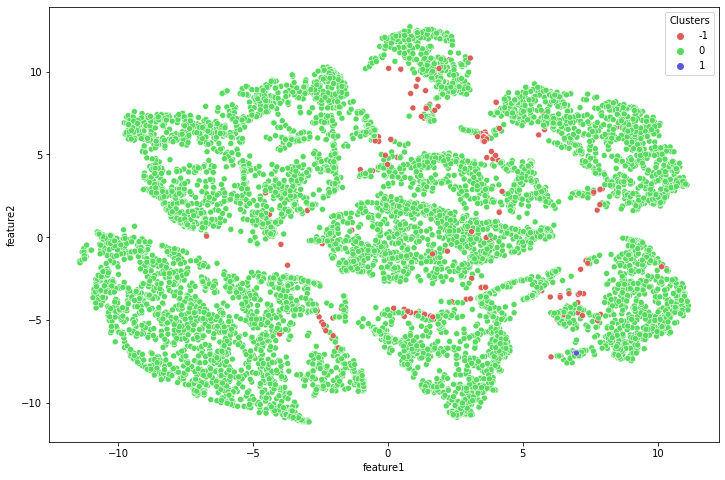

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_dbscan,    
    hue=df_embed_dbscan['Clusters'],
    palette=sns.color_palette("hls", 3)
)


DBSCAN not good here

## 3. <a>hierarchical</a>


##### Dendrogram

Text(20, 42, 'Cut off')

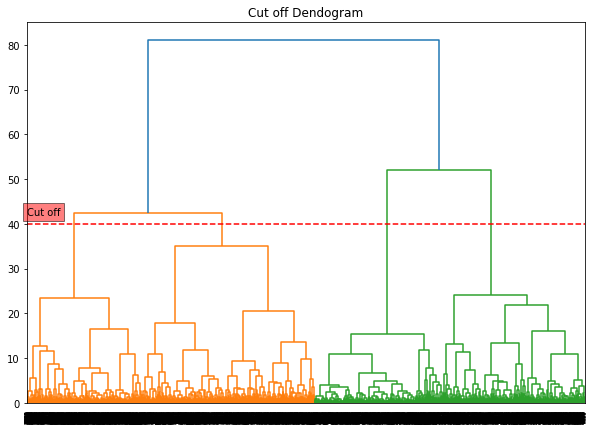

In [29]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Cut off Dendogram")
dend = shc.dendrogram(shc.linkage(y=df_transformed , method='ward',metric='euclidean'))
plt.axhline(y=40, color='r', linestyle='--')
plt.text(20, 42, "Cut off", bbox=dict(facecolor='red', alpha=0.5))

* From Dendrogram will take 4 clusters

In [30]:
from sklearn.cluster import AgglomerativeClustering

clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_transformed)
hier_labels = clustering_Agg.labels_
hier_labels


array([3, 2, 1, ..., 3, 2, 1], dtype=int64)

#### Silhouette score for Hiererichal 

In [31]:
# Calc. silhouette score for hiereichal cluster
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.249


##### TSNE

In [32]:
df_embed_hier = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_hier['Clusters']= pd.DataFrame(hier_labels)
df_embed_hier

feature1   feature2  Clusters
0    -6.625538   0.815032         3
1    -4.543350  -5.765755         2
2     3.539947  -3.538715         1
3     6.848043  -7.046731         1
4     2.528310 -10.778842         1
...        ...        ...       ...
8945 -0.804929   6.344171         3
8946 -3.105992   5.938567         3
8947 -1.853857   6.103190         3
8948 -1.735330  -6.758800         2
8949  6.168268  -4.575955         1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

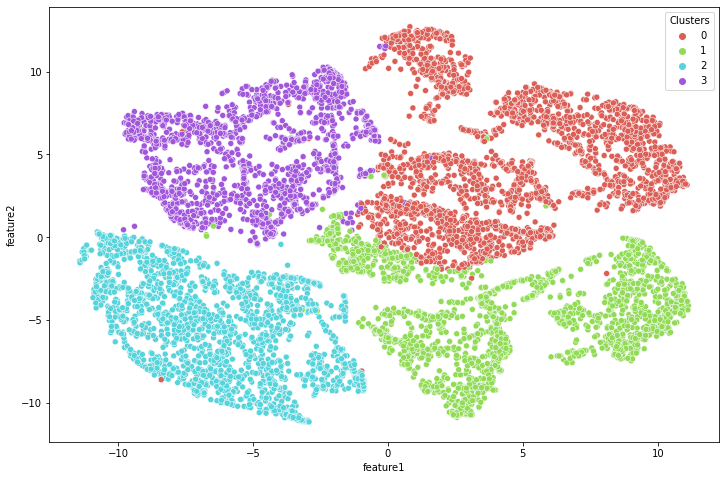

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_hier,    
    hue=df_embed_hier['Clusters'],
    palette=sns.color_palette("hls", 4)
)


- Hiererichal clustering here is a very very good

# Anomaly Detection

## 1. <a>Isolated Random Forest</a>


In [34]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_transformed)

anom_pred = clf.predict(df_transformed)
anom_pred

array([ 1,  1,  1, ..., -1, -1, -1])

In [35]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [36]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0    -6.625538   0.815032       1
1    -4.543350  -5.765755       1
2     3.539947  -3.538715       1
3     6.848043  -7.046731       1
4     2.528310 -10.778842       1
...        ...        ...     ...
8945 -0.804929   6.344171       1
8946 -3.105992   5.938567       1
8947 -1.853857   6.103190      -1
8948 -1.735330  -6.758800      -1
8949  6.168268  -4.575955      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

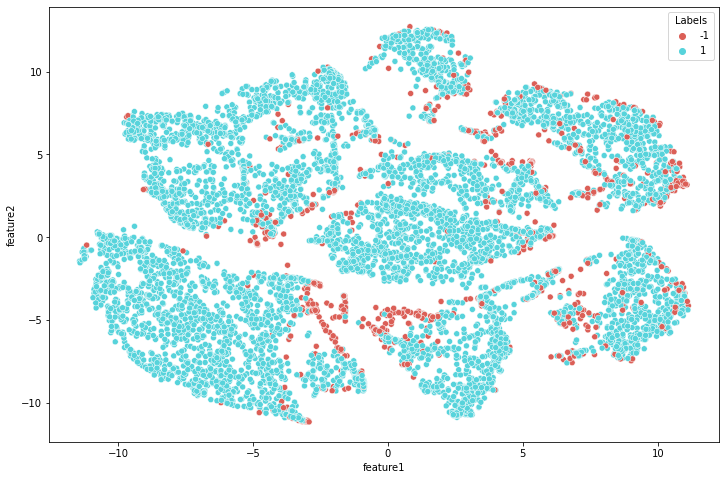

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM</a>


In [38]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_transformed)

In [39]:
scores = gm.score_samples(df_transformed)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [40]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0    -6.625538   0.815032       1
1    -4.543350  -5.765755       1
2     3.539947  -3.538715       1
3     6.848043  -7.046731       1
4     2.528310 -10.778842       1
...        ...        ...     ...
8945 -0.804929   6.344171       1
8946 -3.105992   5.938567      -1
8947 -1.853857   6.103190       1
8948 -1.735330  -6.758800       1
8949  6.168268  -4.575955       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

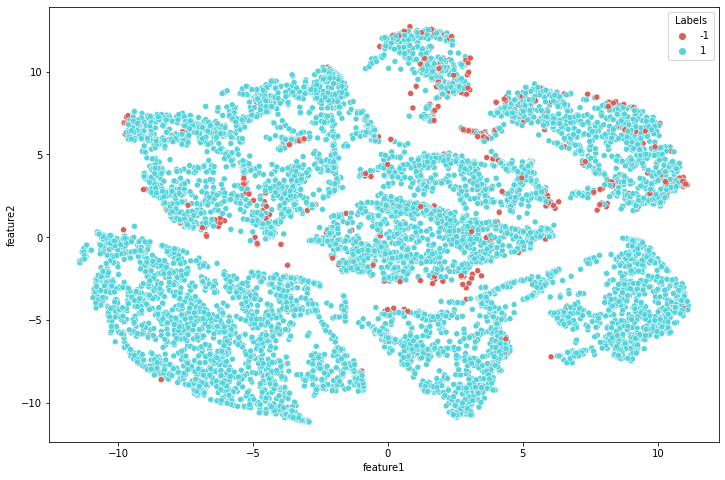

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [42]:
DB = DBSCAN(eps=0.5, min_samples=17).fit(df_transformed)
label_DBScan = DB.labels_

In [43]:
pd.DataFrame(label_DBScan).value_counts()

 0    8655
-1     295
dtype: int64

##### TSNE

In [44]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1   feature2  Labels
0    -6.625538   0.815032       0
1    -4.543350  -5.765755       0
2     3.539947  -3.538715       0
3     6.848043  -7.046731      -1
4     2.528310 -10.778842       0
...        ...        ...     ...
8945 -0.804929   6.344171       0
8946 -3.105992   5.938567       0
8947 -1.853857   6.103190       0
8948 -1.735330  -6.758800       0
8949  6.168268  -4.575955      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

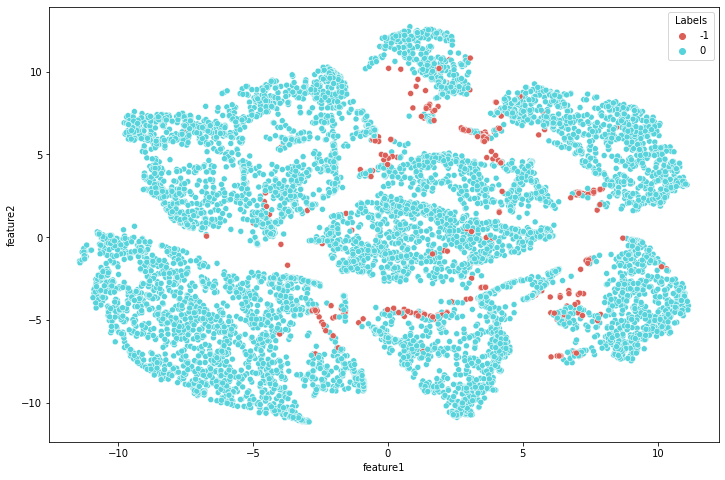

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


# Dimensionality Reduction


## 1.<a> PCA </a>
#### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pca=pd.DataFrame(pca.fit_transform(df_transformed))
df_pca.shape

(8950, 9)

In [47]:
df_pca

0         1         2         3         4         5         6  \
0    -0.293761 -0.519946 -0.223067 -0.304918 -0.073648 -0.022321 -0.032271   
1    -1.058779  0.050202  0.229530  0.323636 -0.247270 -0.037640 -0.004797   
2     0.351065  0.665115 -0.695173 -0.213556 -0.094923  0.238101  0.412771   
3    -0.541499  0.245706 -0.404386 -0.216470  0.200675 -0.202100 -0.216471   
4    -0.562037 -0.148485 -0.423411 -0.299685 -0.271752  0.176226 -0.026964   
...        ...       ...       ...       ...       ...       ...       ...   
8945  0.638230 -0.747144  0.177633  0.309355  0.500640  0.785555 -0.115639   
8946  0.546363 -0.615168  0.288951 -0.213671  0.631631  0.748148 -0.053124   
8947  0.407433 -0.722228  0.098893  0.072935  0.626660  0.715304 -0.067878   
8948 -0.929301 -0.522197 -0.215125  0.299562  0.595321  0.680082 -0.038925   
8949 -0.022465  0.584825 -0.436887  0.087205  0.955685  0.562390  0.071252   

             7         8  
0    -0.069002 -0.075154  
1     0.168872  0.027303  
2     0.090271  0.316393  
3    -0.296490 -0.105634  
4    -0.045069 -0.062306  
...        ...       ...  
8945 -0.027193  0.045729  
8946  0.008779  0.094587  
8947  0.003434  0.037688  
8948 -0.020307 -0.220658  
8949 -0.085117  0.142121  

[8950 rows x 9 columns]

## 2. <a> Kernal-PCA </a>
#### Non-linear dimensionality reduction through the use of kernels 

In [48]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=10, kernel='rbf')
df_kpca = pd.DataFrame(kpca.fit_transform(df_transformed))
df_kpca

0         1         2         3         4         5         6  \
0    -0.093291 -0.168014 -0.084374 -0.105515 -0.015575 -0.017650 -0.018740   
1    -0.338107  0.010756  0.080325  0.100697 -0.077429 -0.019931  0.026470   
2     0.109630  0.221139 -0.217310 -0.056489 -0.039261  0.084983  0.077107   
3    -0.171566  0.078967 -0.128552 -0.070529  0.074659 -0.059093 -0.082966   
4    -0.183134 -0.045545 -0.141691 -0.100846 -0.090025  0.040726 -0.017389   
...        ...       ...       ...       ...       ...       ...       ...   
8945  0.199390 -0.231544  0.047911  0.104821  0.124709  0.257638 -0.067706   
8946  0.172948 -0.192417  0.081339 -0.057769  0.167883  0.259230 -0.033484   
8947  0.131828 -0.225875  0.022270  0.029024  0.170719  0.248238 -0.047144   
8948 -0.277678 -0.150899 -0.066178  0.099669  0.168879  0.232797  0.003696   
8949 -0.005975  0.186031 -0.129686  0.033893  0.272211  0.216364 -0.036885   

             7         8         9  
0     0.007970 -0.016212  0.107950  
1    -0.029944  0.034341 -0.019066  
2     0.117528  0.111503 -0.002090  
3    -0.001345 -0.076876 -0.033863  
4    -0.002057 -0.030341 -0.001326  
...        ...       ...       ...  
8945 -0.009491  0.005859 -0.014024  
8946 -0.003388  0.025596 -0.014283  
8947 -0.007512  0.011056  0.004550  
8948 -0.049756 -0.065750  0.032685  
8949  0.051268  0.028443  0.012139  

[8950 rows x 10 columns]

# Clustering + PCA

## KMean + PCA

In [49]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_pca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2292
sum of elements that contain in cluster 1 : 2555
sum of elements that contain in cluster 2 : 2024
sum of elements that contain in cluster 3 : 2079
--------------------------------------------------


In [50]:
score = silhouette_score(df_pca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.302


Using PCA made Silhoutte score increase

In [51]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -6.625538   0.815032         3
1    -4.543350  -5.765755         1
2     3.539947  -3.538715         3
3     6.848043  -7.046731         3
4     2.528310 -10.778842         3
...        ...        ...       ...
8945 -0.804929   6.344171         0
8946 -3.105992   5.938567         0
8947 -1.853857   6.103190         0
8948 -1.735330  -6.758800         1
8949  6.168268  -4.575955         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

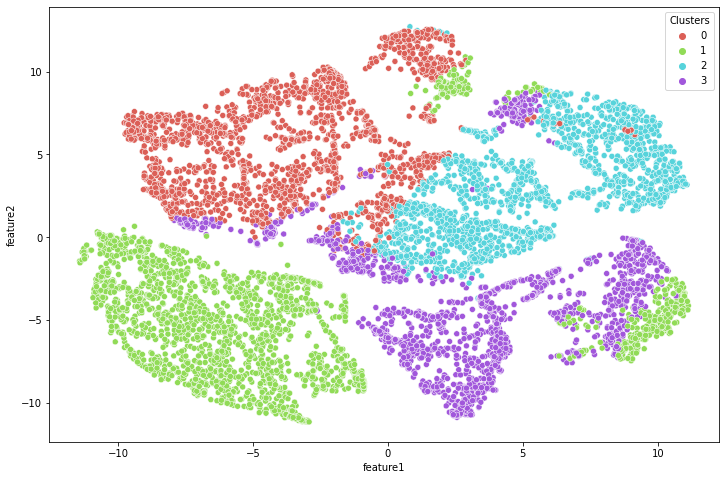

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## DBSCAN + PCA

In [53]:
clustering_DB_1 = DBSCAN(eps=0.51, min_samples=12).fit(df_pca)
label_DBScan_1 = clustering_DB_1.labels_

In [54]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    8899
-1      51
dtype: int64

when we use PCA with DBSCAN with same epsilon can notice that noise points decrease and data be at one cluster


## Hierarchical + PCA

In [55]:
clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_pca)
hier_labels = clustering_Agg.labels_
hier_labels


array([1, 2, 3, ..., 1, 2, 3], dtype=int64)

In [56]:

score = silhouette_score(df_pca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.263


In [57]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -6.625538   0.815032         1
1    -4.543350  -5.765755         2
2     3.539947  -3.538715         3
3     6.848043  -7.046731         3
4     2.528310 -10.778842         3
...        ...        ...       ...
8945 -0.804929   6.344171         1
8946 -3.105992   5.938567         1
8947 -1.853857   6.103190         1
8948 -1.735330  -6.758800         2
8949  6.168268  -4.575955         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

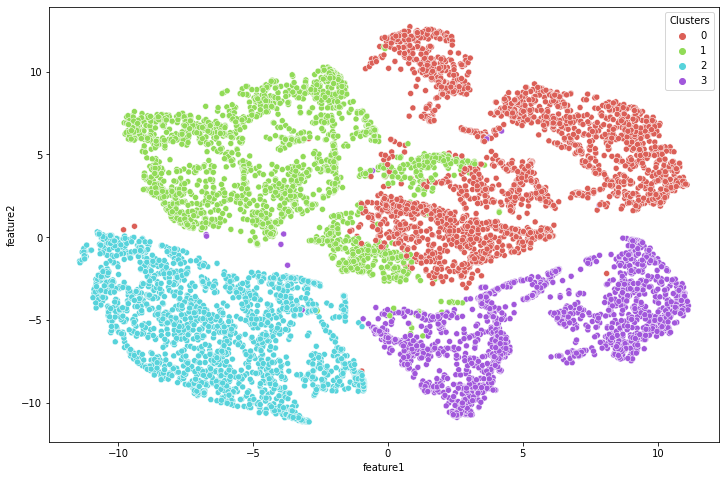

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

# Anomaly Detection + PCA

## 1. <a>Isolated Random Forest + PCA </a>


In [59]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_pca)

anom_pred = clf.predict(df_pca)
anom_pred

array([ 1,  1, -1, ...,  1, -1, -1])

In [60]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [61]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0    -6.625538   0.815032       1
1    -4.543350  -5.765755       1
2     3.539947  -3.538715      -1
3     6.848043  -7.046731       1
4     2.528310 -10.778842       1
...        ...        ...     ...
8945 -0.804929   6.344171      -1
8946 -3.105992   5.938567      -1
8947 -1.853857   6.103190       1
8948 -1.735330  -6.758800      -1
8949  6.168268  -4.575955      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

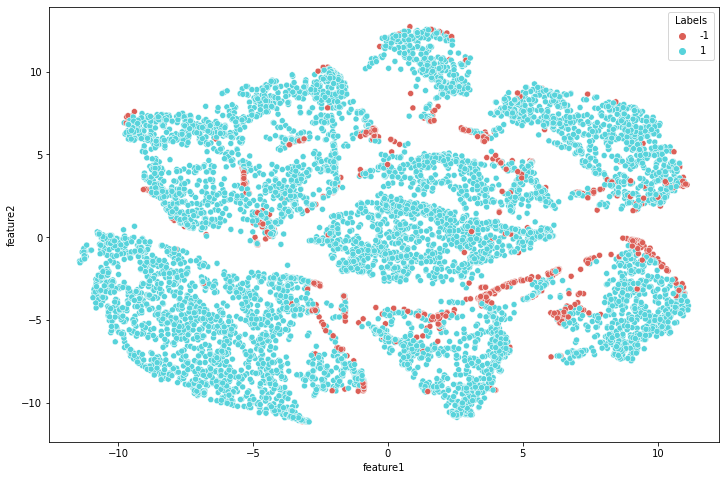

In [62]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + PCA</a>


In [63]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_pca)

In [64]:
scores = gm.score_samples(df_pca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [65]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0    -6.625538   0.815032       1
1    -4.543350  -5.765755       1
2     3.539947  -3.538715       1
3     6.848043  -7.046731       1
4     2.528310 -10.778842       1
...        ...        ...     ...
8945 -0.804929   6.344171      -1
8946 -3.105992   5.938567      -1
8947 -1.853857   6.103190      -1
8948 -1.735330  -6.758800      -1
8949  6.168268  -4.575955      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

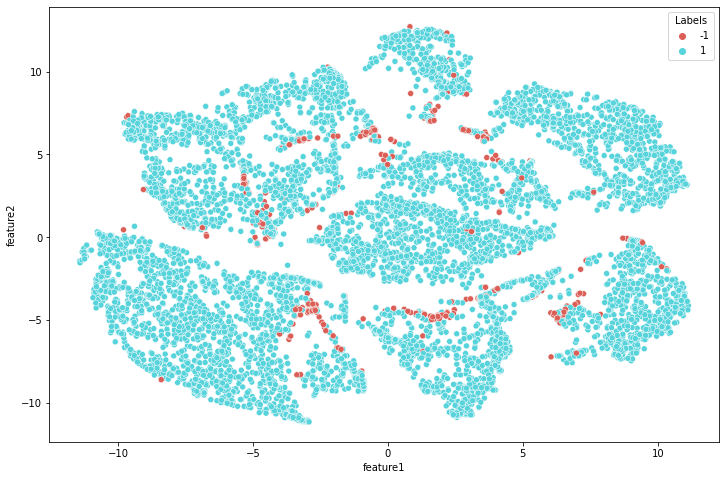

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN + PCA</a>


In [67]:
DB = DBSCAN(eps=0.5, min_samples=17).fit(df_pca)
label_DBScan = DB.labels_

In [68]:
pd.DataFrame(label_DBScan).value_counts()

 0    8868
-1      82
dtype: int64

Can notice that using DBSAN with same epsilon with PCA number of noise points decrease .

##### TSNE

In [69]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1   feature2  Labels
0    -6.625538   0.815032       0
1    -4.543350  -5.765755       0
2     3.539947  -3.538715       0
3     6.848043  -7.046731       0
4     2.528310 -10.778842       0
...        ...        ...     ...
8945 -0.804929   6.344171       0
8946 -3.105992   5.938567       0
8947 -1.853857   6.103190       0
8948 -1.735330  -6.758800       0
8949  6.168268  -4.575955       0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

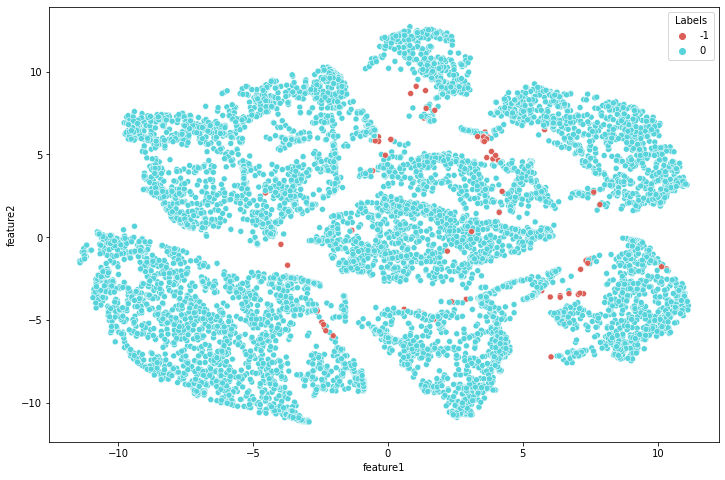

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


# Clustering + KernalPCA

## KMean + KernalPCA

In [71]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_kpca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2298
sum of elements that contain in cluster 1 : 2516
sum of elements that contain in cluster 2 : 2025
sum of elements that contain in cluster 3 : 2111
--------------------------------------------------


In [72]:
score = silhouette_score(df_kpca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.303


In [73]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -6.625538   0.815032         3
1    -4.543350  -5.765755         1
2     3.539947  -3.538715         3
3     6.848043  -7.046731         3
4     2.528310 -10.778842         3
...        ...        ...       ...
8945 -0.804929   6.344171         0
8946 -3.105992   5.938567         0
8947 -1.853857   6.103190         0
8948 -1.735330  -6.758800         1
8949  6.168268  -4.575955         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

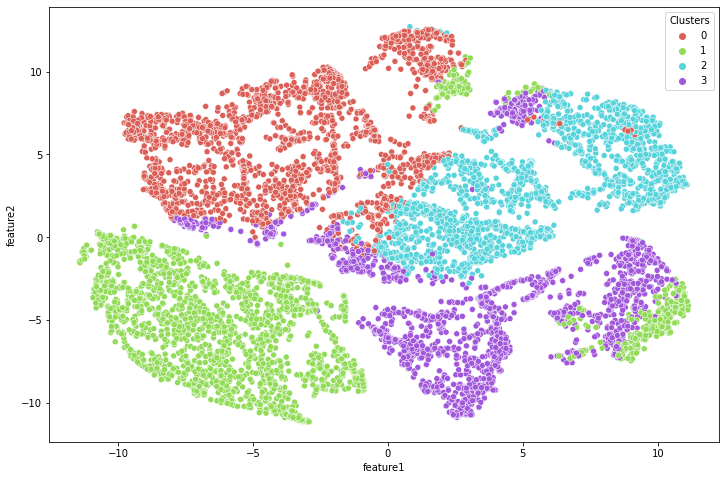

In [74]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## Hierarchical + KernalPCA

In [75]:
clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_kpca)
hier_labels = clustering_Agg.labels_
hier_labels


array([1, 2, 3, ..., 1, 2, 3], dtype=int64)

In [76]:

score = silhouette_score(df_kpca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.259


In [77]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -6.625538   0.815032         1
1    -4.543350  -5.765755         2
2     3.539947  -3.538715         3
3     6.848043  -7.046731         3
4     2.528310 -10.778842         3
...        ...        ...       ...
8945 -0.804929   6.344171         1
8946 -3.105992   5.938567         1
8947 -1.853857   6.103190         1
8948 -1.735330  -6.758800         2
8949  6.168268  -4.575955         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

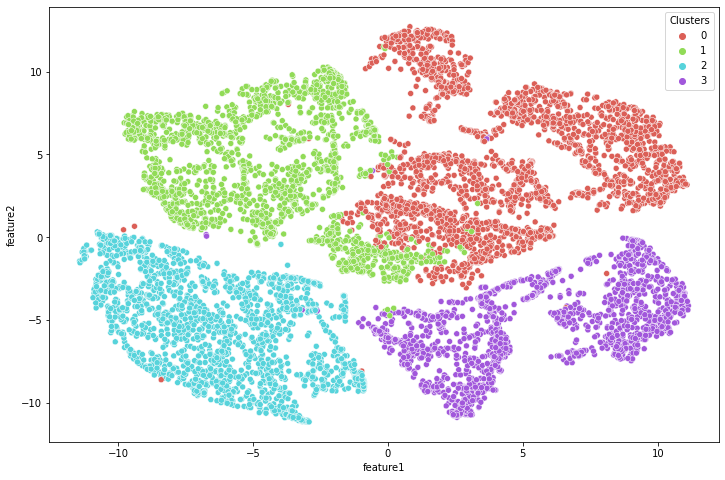

In [78]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## DBSCAN + KernalPCA

In [79]:
clustering_DB_1 = DBSCAN(eps=0.51, min_samples=12).fit(df_kpca)
label_DBScan_1 = clustering_DB_1.labels_

In [80]:
pd.DataFrame(label_DBScan_1).value_counts()

0    8950
dtype: int64

Same epsilon not give noise points at this case compare to result without using any dimensionality reduction or using PCA.

# Anomaly Detection + KernalPCA

## 1. <a>Isolated Random Forest + KernalPCA</a>


In [81]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_kpca)

anom_pred = clf.predict(df_kpca)
anom_pred

array([ 1,  1, -1, ...,  1, -1, -1])

In [82]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [83]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0    -6.625538   0.815032       1
1    -4.543350  -5.765755       1
2     3.539947  -3.538715      -1
3     6.848043  -7.046731       1
4     2.528310 -10.778842       1
...        ...        ...     ...
8945 -0.804929   6.344171      -1
8946 -3.105992   5.938567       1
8947 -1.853857   6.103190       1
8948 -1.735330  -6.758800      -1
8949  6.168268  -4.575955      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

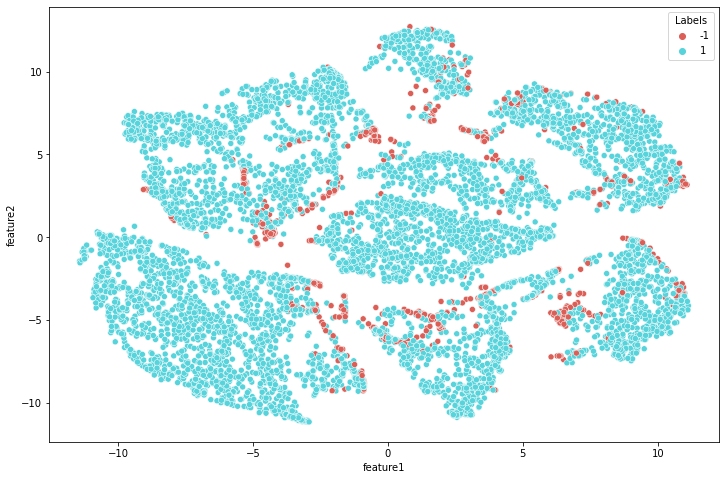

In [84]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + KernalPCA</a>


In [85]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_kpca)

In [86]:
scores = gm.score_samples(df_kpca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [87]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0    -6.625538   0.815032       1
1    -4.543350  -5.765755       1
2     3.539947  -3.538715       1
3     6.848043  -7.046731       1
4     2.528310 -10.778842       1
...        ...        ...     ...
8945 -0.804929   6.344171      -1
8946 -3.105992   5.938567      -1
8947 -1.853857   6.103190      -1
8948 -1.735330  -6.758800       1
8949  6.168268  -4.575955      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

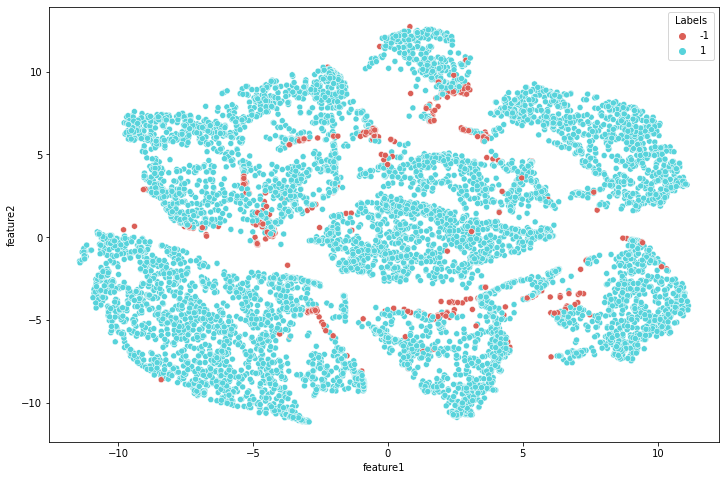

In [88]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [89]:
DB = DBSCAN(eps=0.5, min_samples=17).fit(df_kpca)
label_DBScan = DB.labels_

In [90]:
pd.DataFrame(label_DBScan).value_counts()

0    8950
dtype: int64

using Kernal-PCA at DBSCAN with same parameters not give any noise points 

#### NOTES
- hierarchical Clustering and Kmeans was good result of clustering, but hierarchical was amazing and cluster data better than kmean, and DBSCAN was the worest technique here for clustering.
- Result (Score) when using dimensionality Reduction (PCA and KernalPCA) became better.

- I use different approaches to evaluate the perforamance of clustering models :
    <p> • Silhoutte Score </p>
    <p> • Davies Bouldin Score </p>
    <p> • Calinski Harabasz Score </p>
    <p> • TSNE Visualization </p>